Download the kaggle mnist sign language dataset


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
torch.device('cuda') 
np.random.seed(42)

In [3]:
path = Config.data_path()/'mnist-asl'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/home/jupyter/.fastai/data/mnist-asl')

In [8]:
#! kaggle datasets download -d datamunge/sign-language-mnist -f sign_mnist_train.zip -p {path}  
#! kaggle datasets download -d datamunge/sign-language-mnist -f sign_mnist_test.zip -p {path}  
#! unzip -q -n {path}/sign_mnist_train.zip -d {path}
#! unzip -q -n {path}/sign_mnist_test.zip -d {path}

In [9]:
! ls -altr {path}

total 134304
-rw-r--r-- 1 jupyter jupyter 21777485 Oct 17  2017 sign_mnist_test.csv
-rw-r--r-- 1 jupyter jupyter 83281065 Oct 17  2017 sign_mnist_train.csv
drwxr-xr-x 3 jupyter jupyter     4096 Jun 14 18:24 ..
-rw-r--r-- 1 jupyter jupyter 25761228 Jun 14 18:32 sign_mnist_train.zip
-rw-r--r-- 1 jupyter jupyter  6688512 Jun 14 18:32 sign_mnist_test.zip
drwxr-xr-x 2 jupyter jupyter     4096 Jun 14 18:33 .


Construct Dataset from download


In [4]:
df = pd.read_csv(path/'sign_mnist_test.csv')
df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,...,187,189,192,193,194,194,194,195,195,194
6,10,93,100,112,118,123,127,131,133,136,...,173,175,177,178,180,180,181,181,181,183
7,14,177,177,177,177,177,178,179,179,178,...,232,223,224,224,223,221,221,221,220,219
8,3,191,194,196,198,201,203,204,205,205,...,43,57,78,64,47,62,65,62,62,68
9,7,171,172,172,173,173,173,173,173,172,...,199,199,198,196,195,194,183,85,65,124


In [15]:
df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

SyntaxError: unexpected EOF while parsing (<ipython-input-14-329b6f661968>, line 1)

In [5]:
labels = df.values[:, 0]
test_labels = labels

In [25]:
labels[:5]


array([ 6,  5, 10,  0,  3])

In [202]:
def label_to_ascii(label): 
    # adjust per missing j 
    fudge_factor = 0
    if label > 8:
        fudge_factor = 1
    return str(chr(label + 65 + fudge_factor))
ascii_labels = [label_to_ascii(label) for label in labels]
ascii_labels[:10]

['P', 'S']

In [6]:
pixels = df.values[:, 1:]
test_pixels = np.reshape(pixels, (-1, 28, 28))

In [59]:
from matplotlib import pyplot as plt
def plot_from_pixels(in_pixels, label): 
    dim_3_arr = np.reshape(in_pixels, (28, 28, 1)) / 255
    img = np.zeros((28, 28, 3))
    for j in range(3): 
        img[:, :, j] = dim_3_arr[:, :, 0]
    
    print(label_to_ascii(label))
    plt.imshow(img)
    plt.gray()
    plt.show()

P


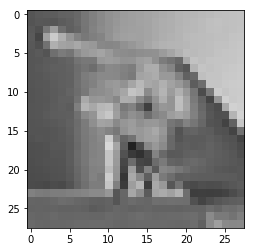

In [62]:
plot_from_pixels(pixels[27], labels[27])

In [7]:
df_train = pd.read_csv(path/'sign_mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
train_labels = df_train.values[:, 0]
train_pixels = np.reshape(df_train.values[:, 1:], (-1, 28, 28))
print(len(train_labels), len(train_pixels))

27455 27455


In [79]:
??torch.utils.data.Dataset

Init signature: torch.utils.data.Dataset()
Source:        
class Dataset(object):
    """An abstract class representing a Dataset.

    All other datasets should subclass it. All subclasses should override
    ``__len__``, that provides the size of the dataset, and ``__getitem__``,
    supporting integer indexing in range from 0 to len(self) exclusive.
    """

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])
File:           /opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataset.py
Type:           type
Subclasses:     TensorDataset, ConcatDataset, Subset, LabelList, VisionDataset


# build into data bunch

In [10]:
# per https://www.kaggle.com/heye0507/fastai-1-0-with-customized-itemlist
class PixelImageItemList(ImageList):
    def open(self,fn):
        regex = re.compile(r'\d+')
        fn = re.findall(regex,fn)
        df = self.inner_df[self.inner_df.fn.values == int(fn[0])]
        df_fn = df[df.fn.values == int(fn[0])]
        img_pixel = df_fn.drop(labels=['label','fn'],axis=1).values
        img_pixel = img_pixel.reshape(28,28)
        img_pixel = np.stack((img_pixel,)*3,axis=-1)
        return vision.Image(pil2tensor(img_pixel,np.float32).div_(255))

In [11]:

df_train['fn'] = df_train.index

src = (PixelImageItemList.from_df(df_train,'.',cols='fn')
      .split_by_rand_pct()
      .label_from_df(cols='label'))
data = (src.transform(tfms=(rand_pad(padding=5,size=28,mode='zeros'),[]))
       .databunch(num_workers=8,bs=256)
       .normalize(imagenet_stats))

In [158]:
# def to3D(img): 
#     ret_val = np.zeros((3, 28, 28))
#     for i in range(3): 
#         ret_val[i] = img
#     return ret_val

# class ASLDataset(Dataset):
#     def __init__(self, x, y):
#         self.x = [to3D(img/255) for img in x]
#         self.y = y
#         self.c = 26 # 26 letters 
    
#     @property
#     def classes(self):
#         return [label_to_ascii(l) for l in range(26)]
    
#     def __len__(self):
#         return len(self.x)
    
#     def __getitem__(self, i):
#         return self.x[i], self.y[i]

In [159]:
# train_ds, valid_ds = ASLDataset(train_pixels, train_labels), ASLDataset(test_pixels, test_labels)
# data = DataBunch.create(train_ds, valid_ds, bs=128, num_workers=4)

In [208]:
data.classes[:5], data.c, len(data.train_ds), len(data.valid_ds)

([0, 1, 2, 3, 4], 24, 21964, 5491)

# train model

In [209]:

learn = cnn_learner(data, models.resnet18, metrics=error_rate).to_fp16()

In [171]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.652598,2.438762,0.717902,00:20
1,1.929113,1.887993,0.606993,00:20
2,1.516302,1.450140,0.476780,00:20
3,1.315979,1.280156,0.420324,00:21
4,1.234041,1.266739,0.415225,00:20


In [172]:
learn.save('stage1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


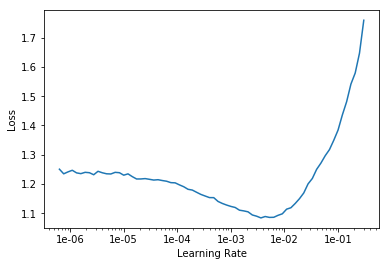

In [173]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [177]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.273614,0.183393,0.057367,00:22
1,0.201039,0.118980,0.040248,00:22
2,0.139021,0.076597,0.024404,00:21
3,0.111596,0.072210,0.024586,00:21


In [178]:
learn.save('stage2')

In [180]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[(13, 12, 38),
 (18, 12, 16),
 (3, 17, 12),
 (17, 20, 11),
 (18, 13, 8),
 (21, 20, 8),
 (4, 3, 4),
 (12, 18, 4),
 (14, 2, 4),
 (12, 4, 3),
 (22, 21, 3),
 (0, 13, 2),
 (8, 24, 2),
 (10, 17, 2),
 (20, 17, 2)]

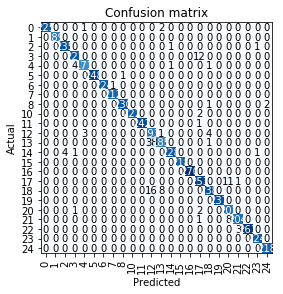

In [181]:
interp.plot_confusion_matrix()

# predict some stuff with the model

In [12]:

learn = cnn_learner(data, models.resnet18, metrics=error_rate).to_fp16()
learn.load('stage2')
print('ya')

FileNotFoundError: [Errno 2] No such file or directory: 'models/stage2.pth'

In [213]:
df_test = df

df_test['fn'] = df_test.index

test_src = (PixelImageItemList.from_df(df_test,'.',cols='fn')
      .split_by_rand_pct()
      .label_from_df(cols='label'))
test_data = (src.transform(tfms=(rand_pad(padding=5,size=28,mode='zeros'),[]))
       .databunch(num_workers=8, bs = 4)
       .normalize(imagenet_stats))

In [1]:
batch = test_data.one_batch()
pixels, labels = batch
for i in range(len(pixels)):
    img = Image(pixels[i])
    expected_label = label_to_ascii(labels[i])
    
    prediction = learn.predict(pixels[i])
    predicted_label = label_to_ascii(prediction[1].item())
    img.show(title="Predicted: {} Actual: {}".format(predicted_label,expected_label))

NameError: name 'test_data' is not defined

In [224]:
learn.export(Path("/home/jupyter/asl-model.pkl"))

export [source] [test] export ( file : PathLikeOrBinaryStream = 'export.pkl' , destroy = False ) 
 
 × Tests found for export : pytest -sv tests/test_basic_train.py::test_export_load_learner [source] To run tests please refer to this guide . Export the state of the Learner in self.path/file . file can be file-like (file or buffer) 
 Show in docs